In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from urllib.request import urlopen

# County data

In [2]:
# Read in the final data
df = pd.read_csv("../../data/final/county_data.csv")
df

,fips,cancer_incidence_rate_per_100000,cancer_mortality_rate_per_100000,breast_cancer_incidence_rate_per_100000,breast_cancer_mortality_rate_per_100000,colorectal_cancer_incidence_rate_per_100000,colorectal_cancer_mortality_rate_per_100000,leukemia_cancer_incidence_rate_per_100000,leukemia_cancer_mortality_rate_per_100000,lung_cancer_incidence_rate_per_100000,...,low_income_low_access_share,non_english_speaking,population_in_poverty_percent,population_over_25_no_high_school_diploma_percent,population_uninsured_percent,population_minority_percent,walkability_index,total_hospitals,unhealthy_air_days,median_aqi
0,1001,490.100000,163.48,129.900000,21.590000,49.5,15.19,13.700000,6.326833,67.8,...,13.021568,1.3,22.665756,7.679865,7.809270,26.023113,5.483179,1.0,NaN,NaN
1,1003,452.400000,165.47,128.100000,22.200000,40.4,13.93,14.000000,5.690000,70.0,...,7.937893,1.8,16.681097,6.790539,9.391678,17.103015,6.812530,4.0,6.0,43.0
2,1005,429.617003,182.94,104.428701,17.199895,44.1,15.42,10.700000,6.326833,63.1,...,10.430856,2.8,35.822744,17.969312,9.438184,54.719092,5.156175,1.0,NaN,NaN
3,1007,467.300000,187.60,140.700000,22.050000,47.0,14.30,10.239413,6.326833,78.3,...,0.445123,1.4,25.610083,13.658711,8.393671,25.583266,5.241296,1.0,NaN,NaN
4,1009,432.000000,176.72,130.000000,20.360000,36.7,14.17,13.900000,6.740000,70.3,...,2.512124,3.3,23.589300,11.839668,9.948922,13.314865,4.674447,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.385946,NaN,NaN,NaN
3239,72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.541645,1.0,NaN,NaN
3240,78010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.280686,1.0,NaN,NaN
3241,78020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.179696,NaN,NaN,NaN


In [3]:
# Read county geojson from the plotly GitHub
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [4]:
def plot_counties(metric):
    # Grab the subset of data for this metric
    subset = df[["fips", metric]]
    subset = subset.dropna()
    
    # Convert FIPS to a string and pad with zeros
    subset["fips"] = subset["fips"].astype("string").str.zfill(5)
    
    # Calculate summary statistics
    minimum = subset[metric].min()
    maximum = subset[metric].max()
    mean = subset[metric].mean()
    std = subset[metric].std()

    # Plot choropleth
    fig = px.choropleth(
        subset,
        geojson=counties,
        locations="fips",
        color=metric,
        # Some series have extreme outliers so scale colors to 95% confidence interval
        range_color=(max(mean - 2 * std, minimum), min(mean + 2 * std, maximum)),
        color_continuous_scale="Viridis",
        scope="usa",
    )

    fig.update_layout(title_text=metric, title_x=0.5)
    fig.layout.coloraxis.colorbar.title = ""
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
    )

    fig.show("png")

# Cancer stats

In [5]:
df[["fips", "cancer_mortality_rate_per_100000"]].dropna().sort_values("cancer_mortality_rate_per_100000")

,fips,cancer_mortality_rate_per_100000
2803,49039,123.264458
2801,49035,123.264458
2802,49037,123.264458
2804,49041,123.264458
2805,49043,123.264458
...,...,...
2397,46061,300.410000
941,20095,300.640000
2375,46017,333.990000
2936,51640,372.850000


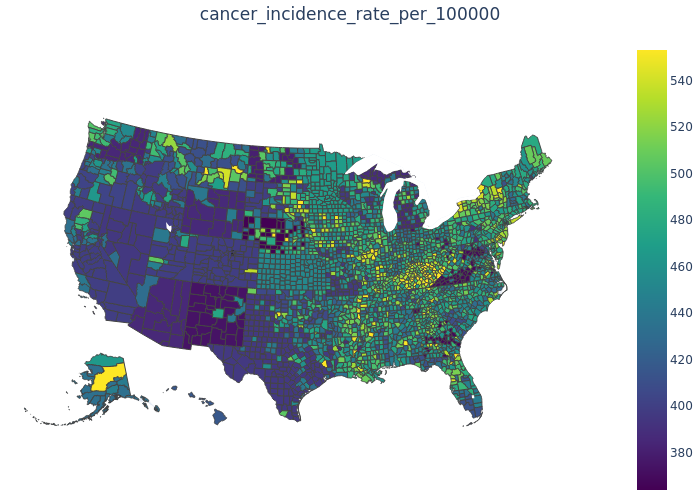

In [6]:
plot_counties("cancer_incidence_rate_per_100000")

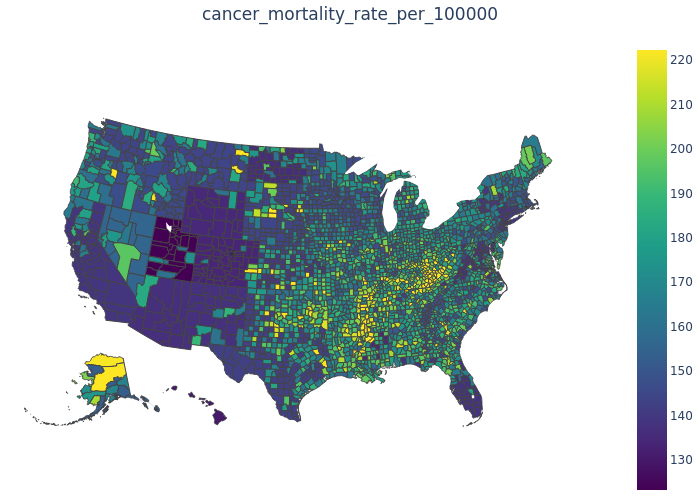

In [7]:
plot_counties("cancer_mortality_rate_per_100000")

# Demographics

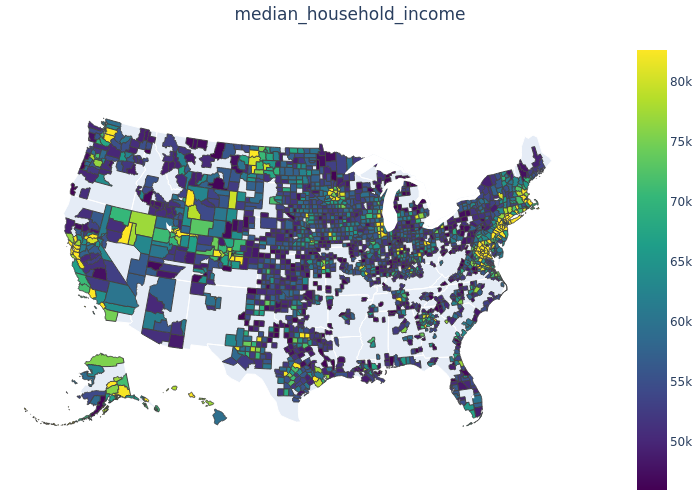

In [8]:
plot_counties("median_household_income")

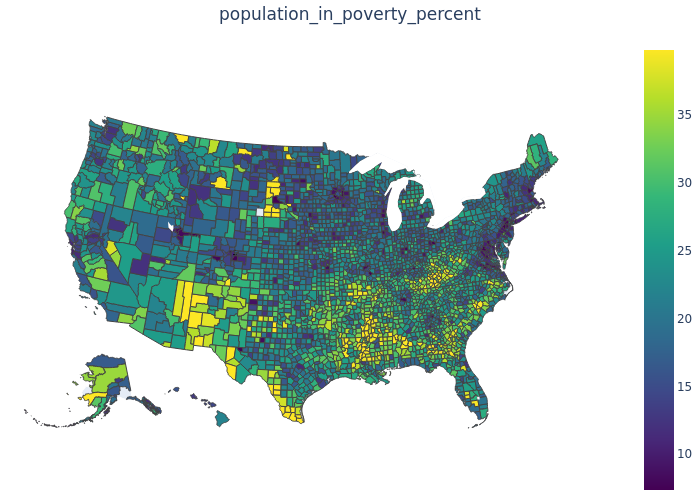

In [9]:
plot_counties("population_in_poverty_percent")

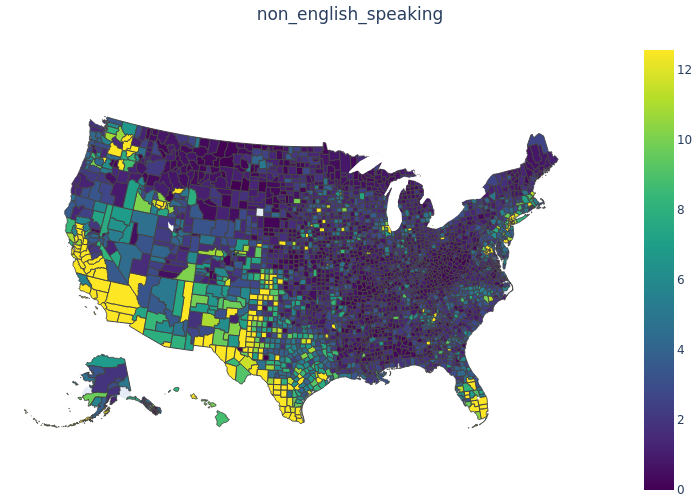

In [11]:
plot_counties("non_english_speaking")

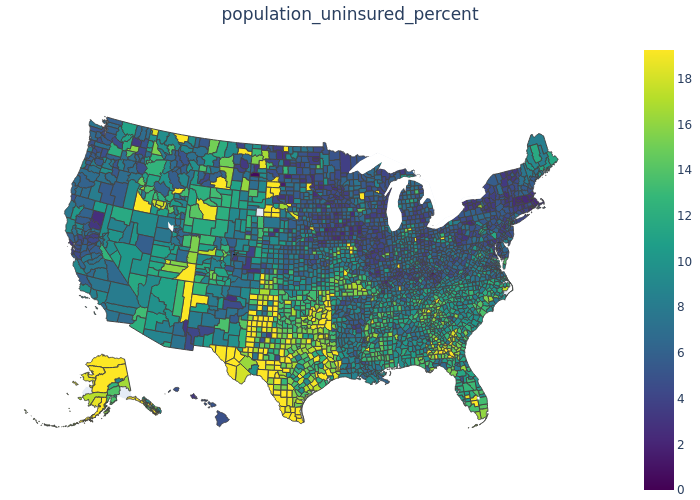

In [14]:
plot_counties("population_uninsured_percent")

# Potential causes

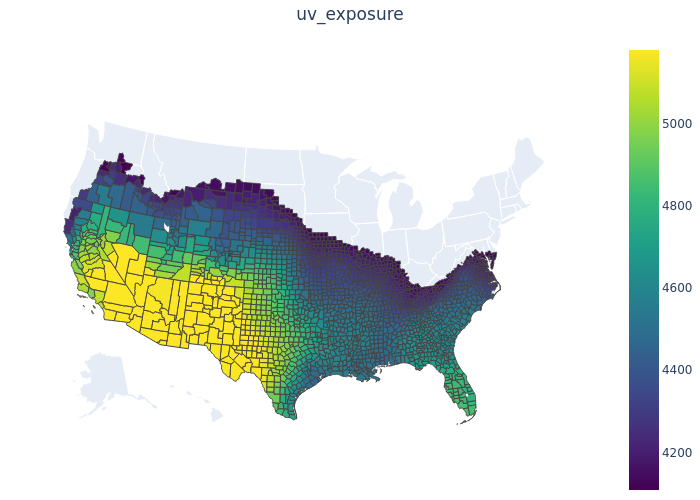

In [16]:
plot_counties("uv_exposure")

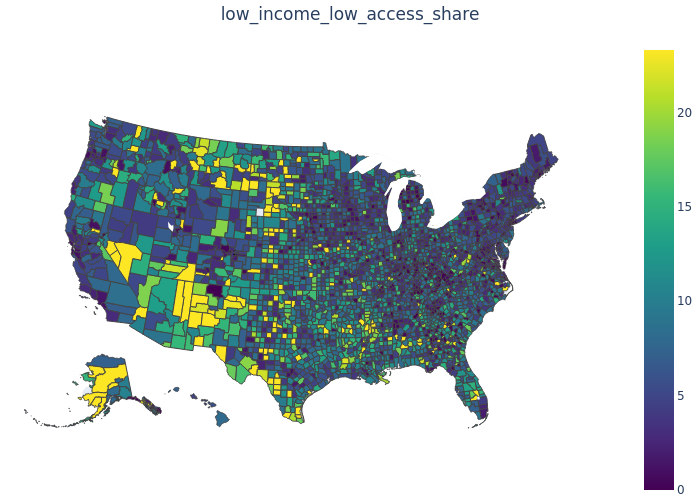

In [17]:
plot_counties("low_income_low_access_share")

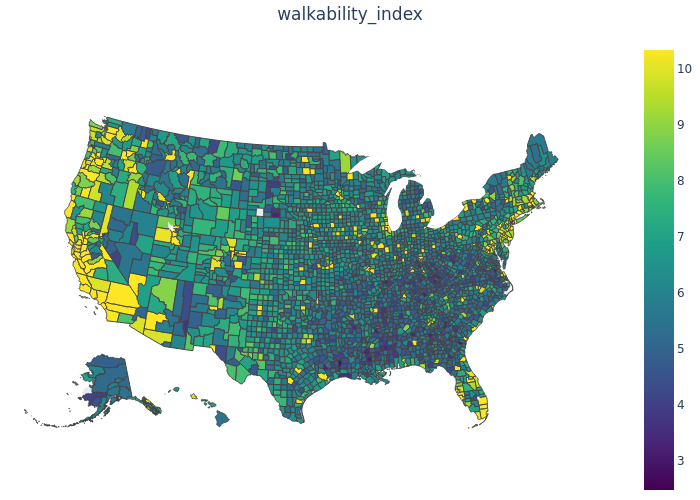

In [18]:
plot_counties("walkability_index")

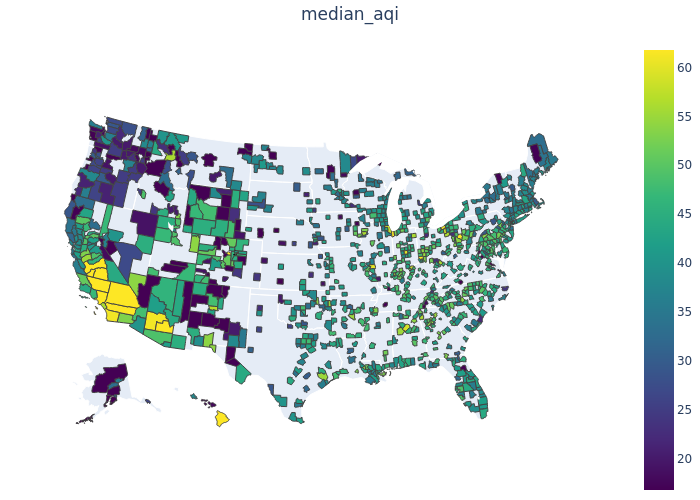

In [20]:
plot_counties("median_aqi")

In [59]:
df.columns

Index(['fips', 'cancer_incidence_rate_per_100000',
       'cancer_mortality_rate_per_100000',
       'breast_cancer_incidence_rate_per_100000',
       'breast_cancer_mortality_rate_per_100000',
       'colorectal_cancer_incidence_rate_per_100000',
       'colorectal_cancer_mortality_rate_per_100000',
       'lung_cancer_incidence_rate_per_100000',
       'lung_cancer_mortality_rate_per_100000',
       'prostate_cancer_incidence_rate_per_100000',
       'prostate_cancer_mortality_rate_per_100000', 'median_household_income',
       'language_isolation_percent', 'over_65_percent',
       'below_poverty_percent', 'uninsured_percent', 'uv_exposure',
       'low_income_low_access_share', 'non_english_speaking',
       'population_in_poverty_percent',
       'population_over_16_unemployed_percent',
       'population_over_25_no_high_school_diploma_percent',
       'population_over_65_percent', 'population_under_17_percent',
       'population_uninsured_percent', 'population_with_disability_pe